In [1]:
import numpy as np
import os
import pandas as pd
import warnings
import seaborn as sn
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

In [2]:
# Read CSV into DataFrame
annualData = pd.read_csv("resources/annualAllStateData.csv")

# Drop the null rows
annualData = annualData.dropna()

# Display DataFrame
annualData

,State,Year,Transportation (MtCO2e),State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Vehicles,sq mi,tempHigh
0,Thiruvottiyur,1994,32.389399,94803.0,4260229,9.682137e+06,2220444.0,4.895600e+04,3176560.0,50645.33,74.10
1,Thiruvanmiyur,1994,11.402707,26188.0,603308,3.097134e+06,273319.0,4.150000e+03,533496.0,570640.95,33.70
2,Tollgate,1994,27.085805,104104.0,4245089,5.289982e+07,1899942.0,3.877400e+04,2813460.0,113594.08,74.70
3,Saidapet West,1994,19.010329,53641.0,2494019,4.535502e+06,1286100.0,2.494800e+04,1566840.0,52035.48,71.10
4,Ekkaduthangal,1994,206.555572,904778.0,31484435,1.130728e+09,12932907.0,2.719430e+05,22338870.0,155779.22,70.60
...,...,...,...,...,...,...,...,...,...,...,...
1269,THANDALAM RD JN.,2018,47.607909,524486.9,7523869,2.702230e+08,2765858.0,6.236666e+04,7152413.0,66455.52,57.70
1270,SIPCOT,2018,13.154700,71858.7,1804291,7.762619e+06,791672.0,1.944732e+04,1693719.0,24038.21,63.30
1271,8IRUNKATTUKOTTAI,2018,31.257005,303767.4,5807406,5.896453e+07,2491234.0,6.588543e+04,5683061.0,54157.80,53.10
1272,PENNALUR E.B.,2018,8.110488,38696.3,577601,2.504852e+06,294731.0,1.043844e+04,837024.0,97093.14,55.50


In [3]:
# Drop row with United States totals data
annualData = annualData.loc[annualData['State'] != 'SRIPERUMBUDUR']

Feauture Selection:

In [4]:
# Set features to be used as x values
features = annualData.drop(columns=['Transportation (MtCO2e)','State', 'Year'])
X = features
X.head()

,State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Vehicles,sq mi,tempHigh
0,94803.0,4260229,9.682137e+06,2220444.0,48956.0,3176560.0,50645.33,74.1
1,26188.0,603308,3.097134e+06,273319.0,4150.0,533496.0,570640.95,33.7
2,104104.0,4245089,5.289982e+07,1899942.0,38774.0,2813460.0,113594.08,74.7
3,53641.0,2494019,4.535502e+06,1286100.0,24948.0,1566840.0,52035.48,71.1
4,904778.0,31484435,1.130728e+09,12932907.0,271943.0,22338870.0,155779.22,70.6


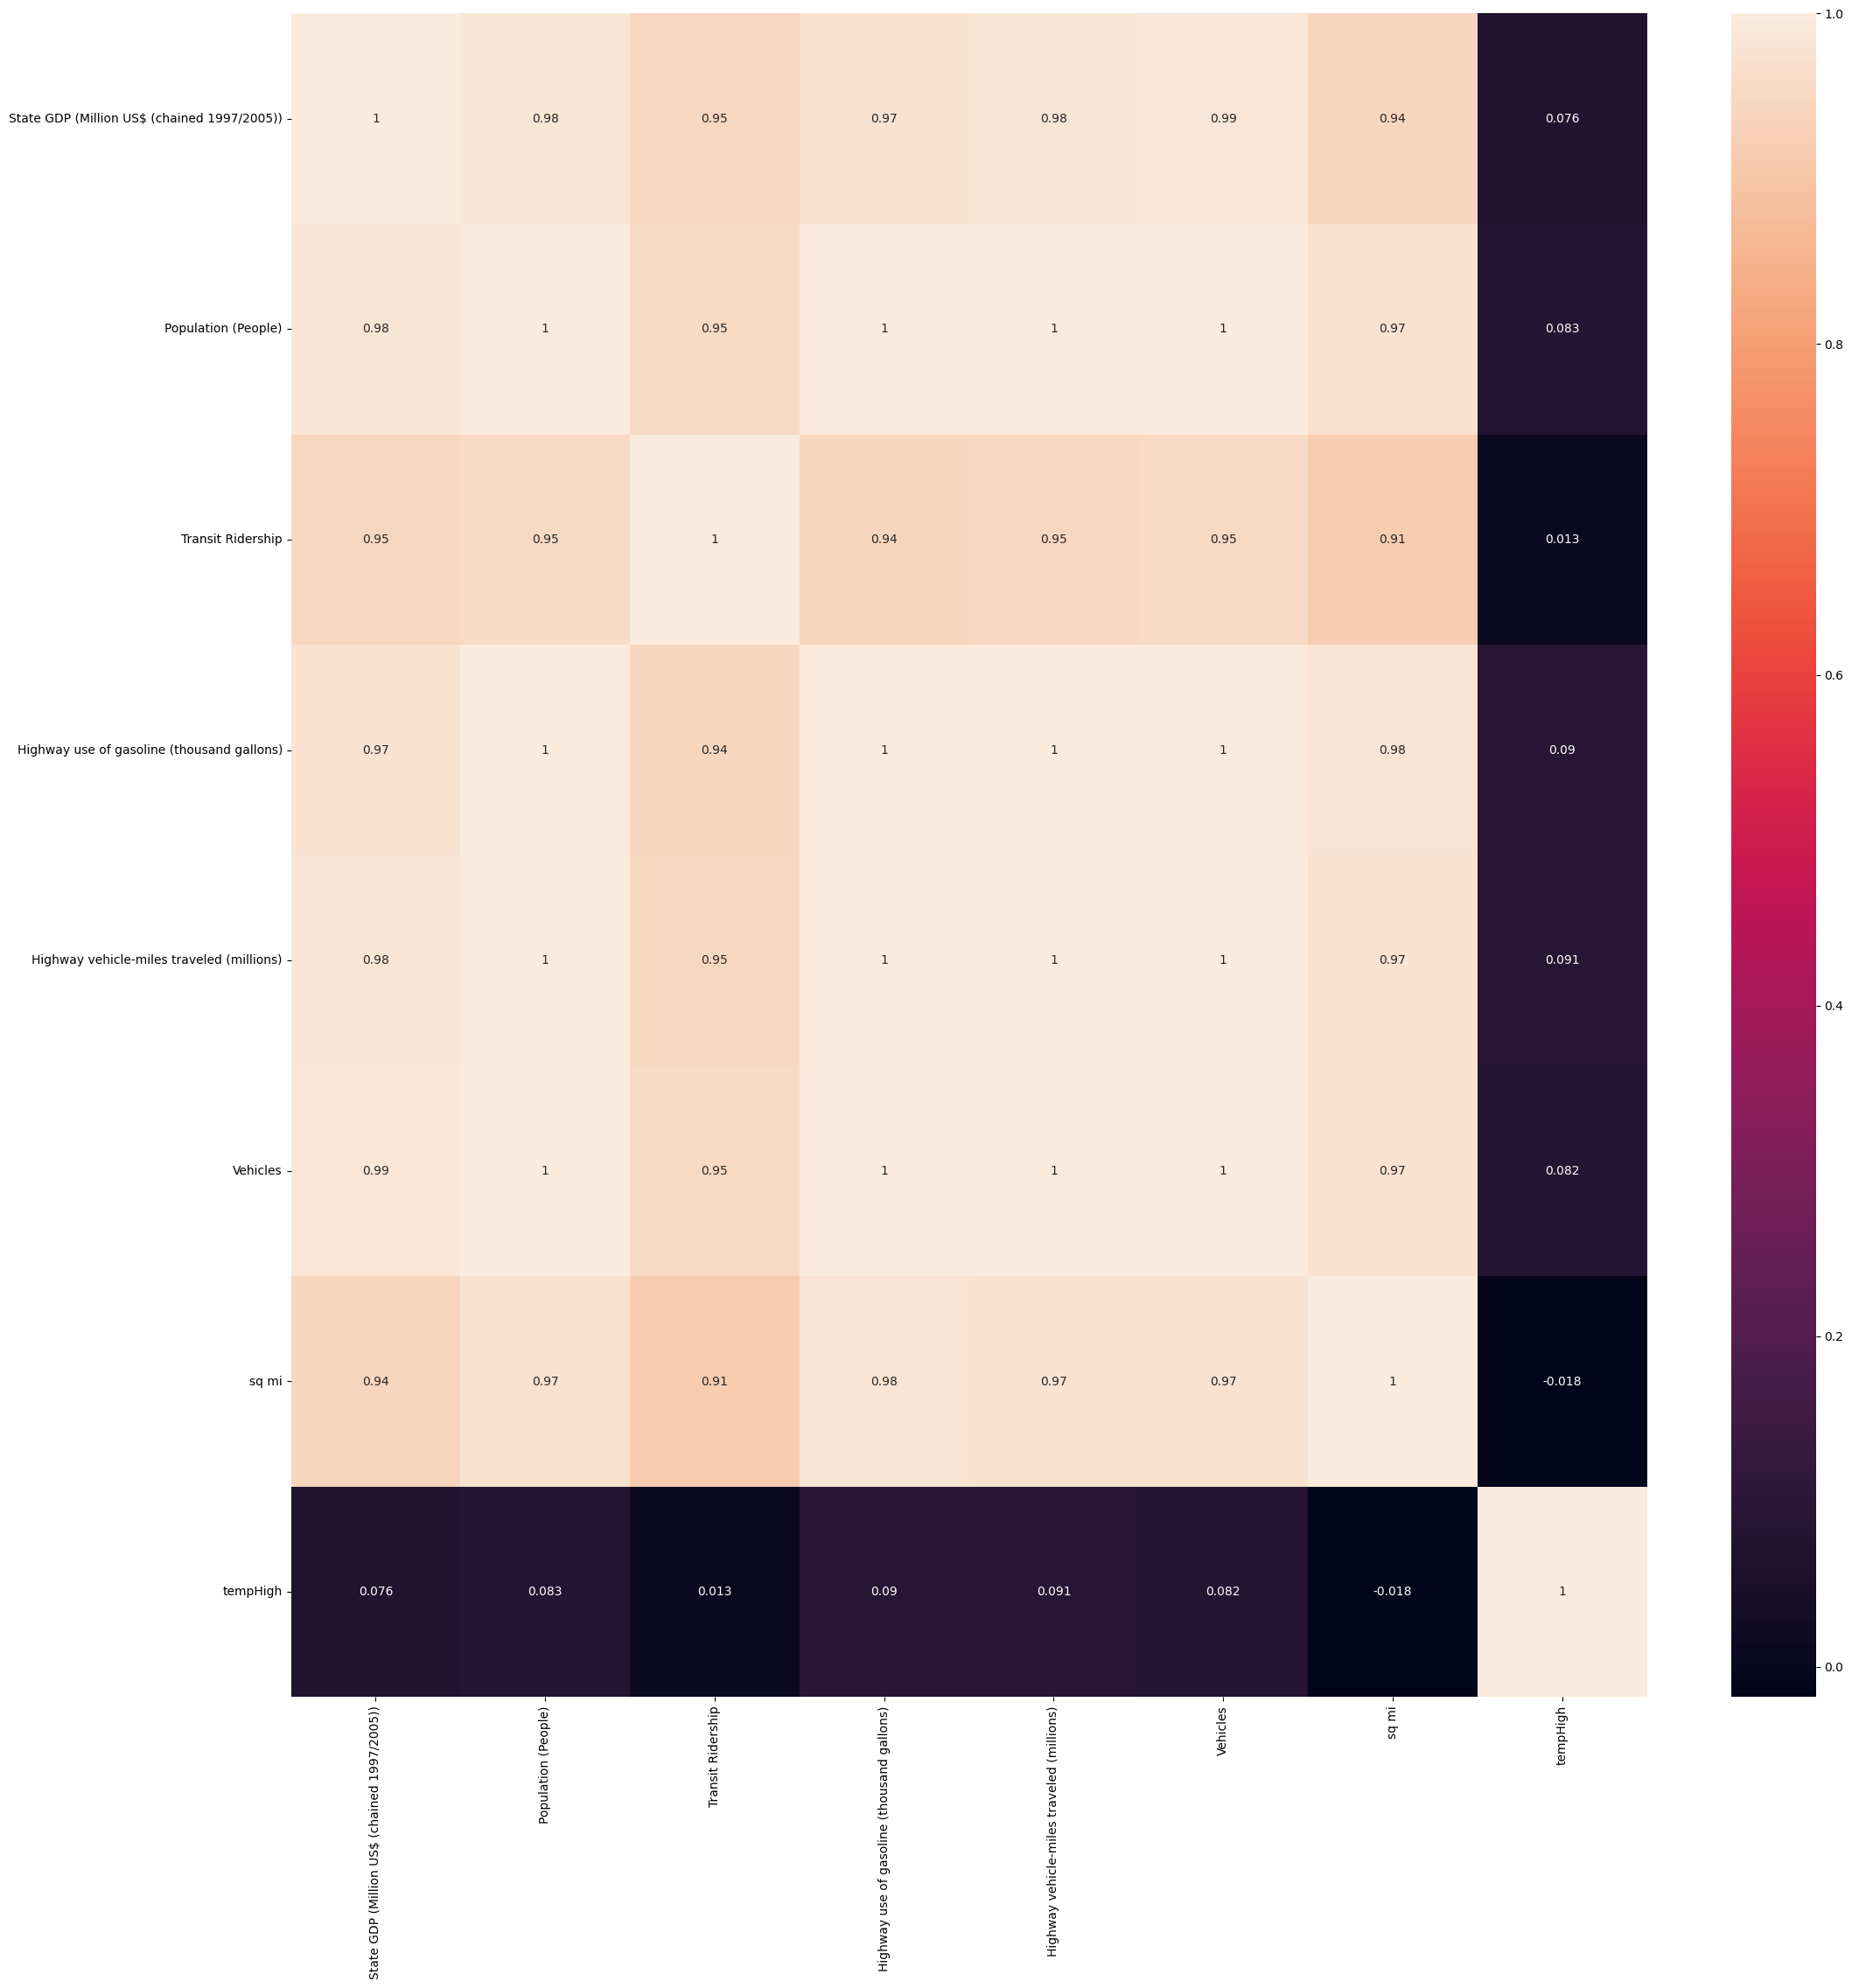

In [5]:
# Develop correlation matrix
X.corr()
corrMatrix = X.corr()

# Show result of correlation matrix
plt.figure(figsize=(25,25))

sn.heatmap(corrMatrix, annot=True)

plt.savefig("Resources/mnCorr.png")

plt.show()

In [6]:
# Re-set features to be used as x values, given above correlation
features = annualData.drop(columns=['Transportation (MtCO2e)','State', 'Highway use of gasoline (thousand gallons)', 'Vehicles', 'Year'])
X = features
X.head()

,State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway vehicle-miles traveled (millions),sq mi,tempHigh
0,94803.0,4260229,9.682137e+06,48956.0,50645.33,74.1
1,26188.0,603308,3.097134e+06,4150.0,570640.95,33.7
2,104104.0,4245089,5.289982e+07,38774.0,113594.08,74.7
3,53641.0,2494019,4.535502e+06,24948.0,52035.48,71.1
4,904778.0,31484435,1.130728e+09,271943.0,155779.22,70.6


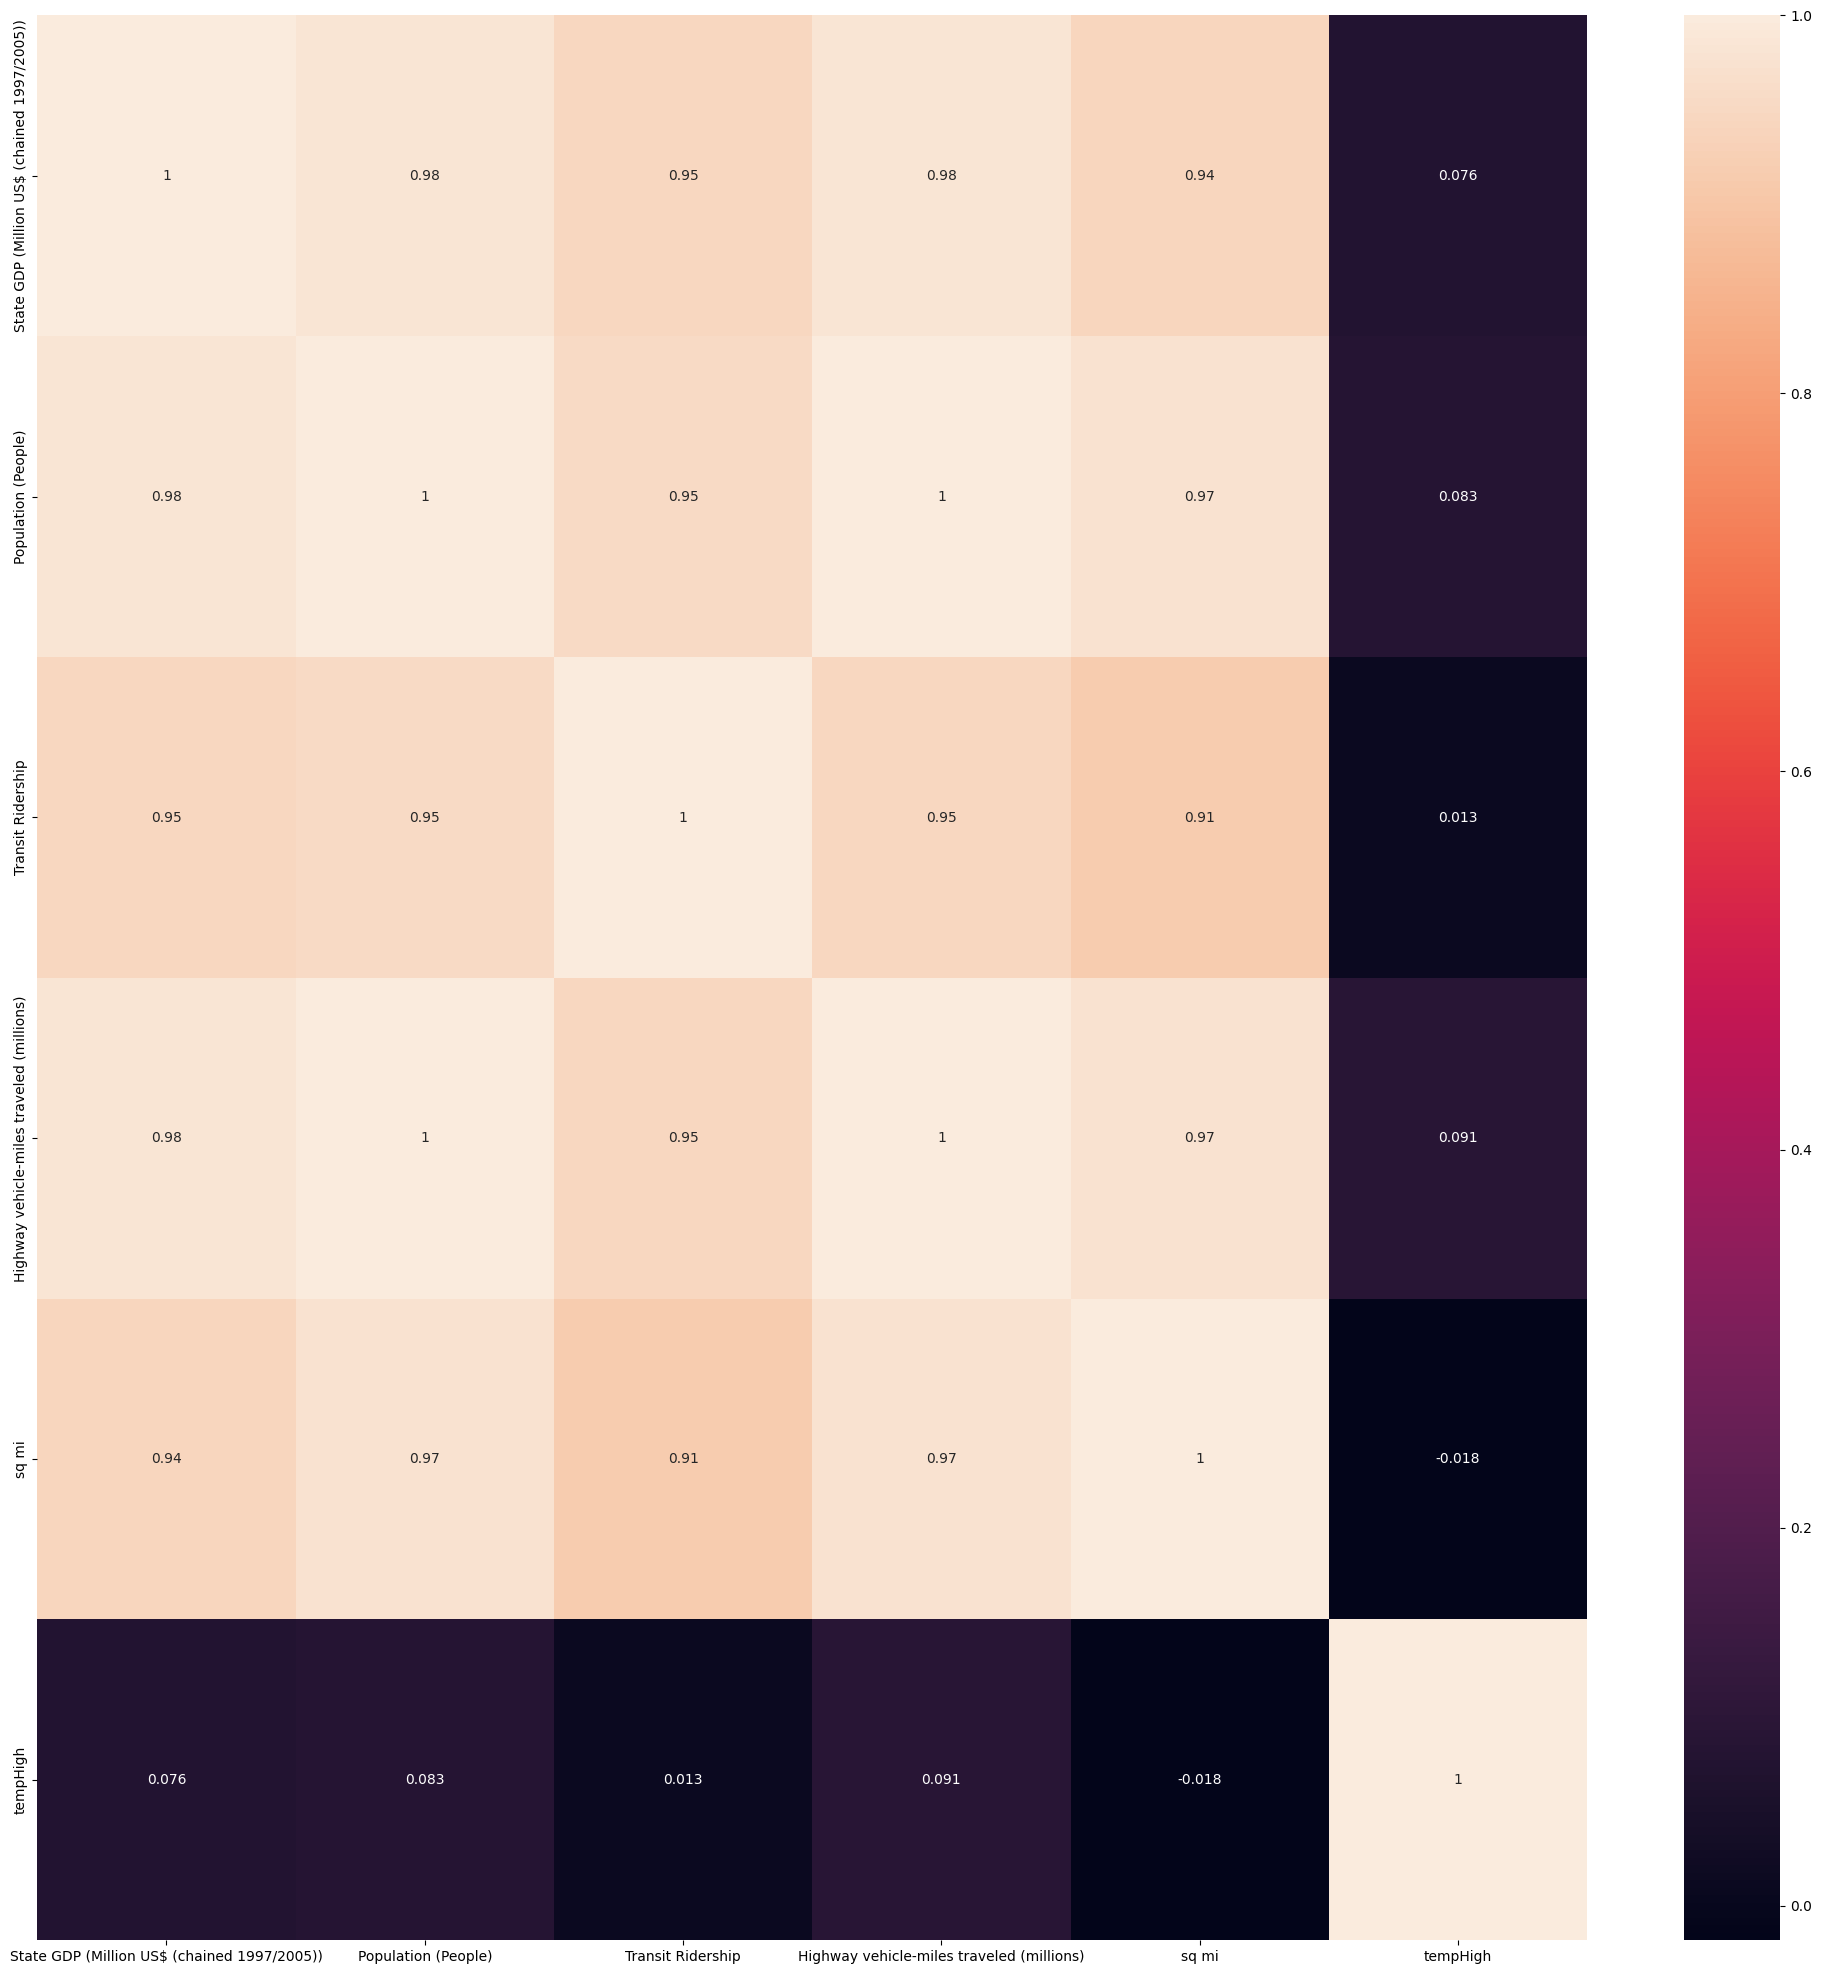

In [7]:
# Re-develop correlation matrix with new features
X.corr()
corrMatrix = X.corr()

# Show result of correlation matrix
plt.figure(figsize=(25,25))

sn.heatmap(corrMatrix, annot=True)

plt.savefig("Resources/mnCorr.png")

plt.show()

##Multiple Linear Regression Model:

Create a Train-Test Split
Use Transportation (MtCO2e) for the y values.

In [8]:
# Set y values
y = annualData['Transportation (MtCO2e)'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1218, 6) (1218, 1)


In [9]:
print(y)

[[  32.38939867]
 [  11.40270658]
 [  27.08580517]
 ...
 [  31.25700488]
 [   8.11048825]
 [1963.615455  ]]


In [10]:
# Dependencies and setup
from sklearn.model_selection import train_test_split

# Use train-test split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway vehicle-miles traveled (millions),sq mi,tempHigh
483,28077.0,919630,1921868.0,10874.0000,145545.80,55.6
142,145391.0,5416643,25518205.0,58435.0000,41234.90,67.5
1053,571424.7,11602700,116660838.0,112766.2818,40860.69,59.3
453,257788.0,6052349,170529374.0,54776.0000,66455.52,56.9
3,53641.0,2494019,4535502.0,24948.0000,52035.48,71.1



Pre-Processing
Scale the data using the StandardScaler and perform some feature selection.

In [11]:
# Dependencies and setup
from sklearn.preprocessing import StandardScaler

# Scale data
X_scale = StandardScaler().fit(X_train)
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

In [12]:
# Display array of scaled values
X_train_scaled

array([[-2.62843589e-01, -2.63052223e-01, -2.62966097e-01,
        -2.58906705e-01,  1.61341841e-02, -9.02000048e-01],
       [-1.96937840e-01, -1.52570257e-01, -2.45802621e-01,
        -1.37593958e-01, -1.97626891e-01,  4.58616053e-01],
       [ 4.24033274e-02, -5.92102621e-04, -1.79507399e-01,
         9.87590467e-04, -1.98393748e-01, -4.78951344e-01],
       ...,
       [-2.40183705e-01, -2.43444986e-01, -2.61793550e-01,
        -2.42515107e-01, -1.12770317e-01, -8.79132551e-01],
       [-3.93435866e-02, -2.10776733e-03, -1.82841117e-01,
        -9.92585763e-04, -1.98393748e-01, -1.81673877e-01],
       [-1.39249890e-01, -1.97857316e-01, -2.33610194e-01,
        -2.06296285e-01, -2.72204988e-01, -3.18878862e-01]])

Train the Multiple Linear Regression Model

In [13]:
# Dependencies and setup
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# Fit the model to the training data and calculate scores for training and testing data
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9975935936245788
Testing Score: 0.9971764509005284


Coefficients (Independent Values)

In [15]:
# Display coefficient factors
print(model.coef_)

[[-71.33542097  69.40092948   1.43029203 244.24335307  17.3790343
    1.8872883 ]]


In [16]:
# Display full amount (not rounded)
model.coef_[0][0]

-71.33542097392089

In [17]:
# Display intercept
print(model.intercept_)

[74.55908835]


In [18]:
# Generate equation
print("The linear equation is: Y = {:.5} + {:.5}*GDP + {:.5}*Population + {:.5}*Transit + {:.5}*VMT + {:.5}*SQMI + {:.5}*Temp".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1], model.coef_[0][2], model.coef_[0][3], model.coef_[0][4], model.coef_[0][5]))

The linear equation is: Y = 74.559 + -71.335*GDP + 69.401*Population + 1.4303*Transit + 244.24*VMT + 17.379*SQMI + 1.8873*Temp


In [19]:
# Define function to predict GHG values
def make_prediction(GDP, population, transit, VMT, SQMI, temperature, coefs, intercept):

    GHG = coefs[0][0] * GDP + coefs[0][1] * population + coefs[0][2] * transit + coefs[0][3] * VMT + coefs[0][4] * SQMI \
          + coefs[0][5] * temperature + intercept[0]
        
    return GHG

In [20]:
# Display prediction
row = 0
GDP_param = X_test_scaled[row][0]
population_param = X_test_scaled[row][1]
transit_param = X_test_scaled[row][2]
VMT_param = X_test_scaled[row][3]
SQMI_param = X_test_scaled[row][4]
temperature_param = X_test_scaled[row][5]

make_prediction(GDP_param, population_param, transit_param, VMT_param, SQMI_param, temperature_param, model.coef_, model.intercept_)

16.57840695578902

Model Accuracy Tests

In [21]:

# R squared
model.score(X_test_scaled, y_test, sample_weight = None)

0.9971764509005284

In [22]:

# Make predictions
predictions = model.predict(X_test_scaled)
predictions[:10]

array([[16.57840696],
       [30.61300588],
       [47.28454146],
       [23.39002828],
       [43.32909702],
       [30.3357323 ],
       [13.85391305],
       [ 1.86701777],
       [29.9492137 ],
       [ 9.24379705]])

In [23]:
# Display y test array of values
y_test[:10]

array([[18.94068559],
       [56.77717718],
       [44.2297886 ],
       [21.23386958],
       [36.43429586],
       [33.71862932],
       [12.80369547],
       [ 3.1175633 ],
       [56.93243351],
       [ 8.60431446]])

In [24]:
# Dependencies and setup
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate and display Mean Square Error
y_true = y_test
y_pred = predictions
mean_squared_error(y_true, y_pred)

231.94705922688303

In [25]:
# Calculate and display Mean Absolute Error
mean_absolute_error(y_true, y_pred)

7.440088755222693

In [26]:
# Calculate and display Root Mean Square Error
np.sqrt(mean_squared_error(y_true, y_pred))

15.229808246556587


Forecasting Selected Features

In [129]:
# Read CSV into DataFrame
annualData = pd.read_csv("resources/annualAllStateData.csv")

# Display DataFrame
annualData

,State,Year,Transportation (MtCO2e),State GDP (Million US$ (chained 1997/2005)),Population (People),Transit Ridership,Highway use of gasoline (thousand gallons),Highway vehicle-miles traveled (millions),Vehicles,sq mi,tempHigh
0,Thiruvottiyur,1994,32.389399,94803.0,4260229,9.682137e+06,2220444.0,4.895600e+04,3176560.0,50645.33,74.10
1,Thiruvanmiyur,1994,11.402707,26188.0,603308,3.097134e+06,273319.0,4.150000e+03,533496.0,570640.95,33.70
2,Tollgate,1994,27.085805,104104.0,4245089,5.289982e+07,1899942.0,3.877400e+04,2813460.0,113594.08,74.70
3,Saidapet West,1994,19.010329,53641.0,2494019,4.535502e+06,1286100.0,2.494800e+04,1566840.0,52035.48,71.10
4,Ekkaduthangal,1994,206.555572,904778.0,31484435,1.130728e+09,12932907.0,2.719430e+05,22338870.0,155779.22,70.60
...,...,...,...,...,...,...,...,...,...,...,...
1269,THANDALAM RD JN.,2018,47.607909,524486.9,7523869,2.702230e+08,2765858.0,6.236666e+04,7152413.0,66455.52,57.70
1270,SIPCOT,2018,13.154700,71858.7,1804291,7.762619e+06,791672.0,1.944732e+04,1693719.0,24038.21,63.30
1271,8IRUNKATTUKOTTAI,2018,31.257005,303767.4,5807406,5.896453e+07,2491234.0,6.588543e+04,5683061.0,54157.80,53.10
1272,PENNALUR E.B.,2018,8.110488,38696.3,577601,2.504852e+06,294731.0,1.043844e+04,837024.0,97093.14,55.50


GDP

In [133]:
# Use pandas pivot function to shift annual values onto single row
GDP = annualData.pivot(index = "Year", columns = "State", values = "State GDP (Million US$ (chained 1997/2005))")

# Display DataFrame
GDP.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THANDALAM RD JN.,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal
Year,,,,,,,,,,,,,,,,,,,,,
1994,596435.0,64713.0,15045.0,298611.0,45806.0,30113.0,25845.0,114156.0,196432.0,28058.0,...,265388.0,25882.0,72406.0,162489.0,112944.0,53852.0,609266.0,76924.0,137379.0,134715.0
1995,203189.0,81919.0,138724.0,304834.0,67531.0,120333.0,116544.0,288720.0,224831.0,66843.0,...,28769.0,51081.0,144371.0,42733.0,271764.0,374858.0,608937.0,18036.0,153785.0,27995.0
1996,7910853.0,49276.0,389704.0,150268.0,1180002.0,169663.0,44604.0,93489.0,91716.0,330321.0,...,521409.0,121489.0,78834.0,214299.0,147889.0,589378.0,273563.0,70361.0,173849.0,246770.0
1997,117441.0,88739.0,219137.0,198279.0,396947.0,102347.0,186425.0,24059.0,40120.0,60444.0,...,416868.0,387811.0,140346.0,302037.0,657573.0,767911.0,9904561.0,1207463.0,269995.0,53246.0
1998,43157.0,1288187.0,54200.0,956232.0,73444.0,24851.0,687088.0,97594.0,172863.0,92223.0,...,60817.0,103619.0,281665.0,35226.0,432479.0,265734.0,122077.0,20497.0,350992.0,193969.0


In [131]:
annualData = annualData.groupby(["Year", "State"], as_index=False).agg({
    "Transportation (MtCO2e)": "sum",  # Aggregating Transportation emissions
    "State GDP (Million US$ (chained 1997/2005))": "sum",  # Aggregating GDP
    "Population (People)": "sum",  # Aggregating Population
    "Transit Ridership": "sum",  # Aggregating Transit Ridership
    "Highway use of gasoline (thousand gallons)": "sum",  # Aggregating Gasoline Use
    "Highway vehicle-miles traveled (millions)": "sum",  # Aggregating Vehicle Miles
    "Vehicles": "sum",  # Aggregating Vehicle Count
    "sq mi": "first",  # Assuming square miles remain constant, so taking the first value
    "tempHigh": "mean"  # Taking the average of the temperature highs
})



In [132]:
pivoted_df = annualData.pivot(index="Year", columns="State", values=[
    "Transportation (MtCO2e)", 
    "State GDP (Million US$ (chained 1997/2005))", 
    "Population (People)", 
    "Transit Ridership", 
    "Highway use of gasoline (thousand gallons)", 
    "Highway vehicle-miles traveled (millions)", 
    "Vehicles", 
    "sq mi", 
    "tempHigh"
])

In [94]:
# Convert index to its own column
GDP["Year"] = GDP.index

# Display DataFrame
GDP.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,596435.0,64713.0,15045.0,298611.0,45806.0,30113.0,25845.0,114156.0,196432.0,28058.0,...,25882.0,72406.0,162489.0,112944.0,53852.0,609266.0,76924.0,137379.0,134715.0,1994
1995,203189.0,81919.0,138724.0,304834.0,67531.0,120333.0,116544.0,288720.0,224831.0,66843.0,...,51081.0,144371.0,42733.0,271764.0,374858.0,608937.0,18036.0,153785.0,27995.0,1995
1996,7910853.0,49276.0,389704.0,150268.0,1180002.0,169663.0,44604.0,93489.0,91716.0,330321.0,...,121489.0,78834.0,214299.0,147889.0,589378.0,273563.0,70361.0,173849.0,246770.0,1996
1997,117441.0,88739.0,219137.0,198279.0,396947.0,102347.0,186425.0,24059.0,40120.0,60444.0,...,387811.0,140346.0,302037.0,657573.0,767911.0,9904561.0,1207463.0,269995.0,53246.0,1997
1998,43157.0,1288187.0,54200.0,956232.0,73444.0,24851.0,687088.0,97594.0,172863.0,92223.0,...,103619.0,281665.0,35226.0,432479.0,265734.0,122077.0,20497.0,350992.0,193969.0,1998


In [95]:
# Create new DataFrame with only desired columns
gdpData = GDP[["Year", "SRIPERUMBUDUR"]].copy()

# Display DataFrame
gdpData.head()

State,Year,SRIPERUMBUDUR
Year,,
1994,1994,294384.0
1995,1995,56528.0
1996,1996,160020.0
1997,1997,895668.0
1998,1998,789382.0


In [96]:
# Reset index in place
gdpData.reset_index(inplace = True, drop = True)

# Display DataFrame
gdpData.head()

State,Year,SRIPERUMBUDUR
0,1994,294384.0
1,1995,56528.0
2,1996,160020.0
3,1997,895668.0
4,1998,789382.0


In [97]:
# Drop index label
gdpData.columns.name = None

# Display DataFrame
gdpData.head()

,Year,SRIPERUMBUDUR
0,1994,294384.0
1,1995,56528.0
2,1996,160020.0
3,1997,895668.0
4,1998,789382.0


In [98]:
# Rename column
gdpData = gdpData.rename(columns = {"SRIPERUMBUDUR":"GDP"})

# Display DataFrame
gdpData

,Year,GDP
0,1994,294384.0
1,1995,56528.0
2,1996,160020.0
3,1997,895668.0
4,1998,789382.0
5,1999,280031.0
6,2000,352464.0
7,2001,39864.0
8,2002,91013.0
9,2003,133652.0



Population

In [99]:
# Use pandas pivot function to shift annual values onto single row
pop = annualData.pivot(index = "Year", columns = "State", values = "Population (People)")

# Display DataFrame
pop.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THANDALAM RD JN.,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal
Year,,,,,,,,,,,,,,,,,,,,,
1994,18459470,2537966,644804,10317307,1639041,1142560,1145140,4347481,6095241,1242662,...,8014306,1015960,3280940,5834746,4991019,2688992,22809151,3121264,5324497,4610355
1995,6141445,3184369,4660180,11202751,2601007,4378779,5034725,8805171,7813573,2553434,...,1243480,1581578,5378247,1720394,8083242,12008437,18524104,876553,5851459,1177322
1996,270598039,1673740,12101997,5431553,38769718,5159493,1752326,3247111,3796200,12220464,...,20083346,4398877,2880000,6179756,5111986,19948911,9758645,2614554,6654916,9747745
1997,3859696,2635292,6112201,5955267,11277357,3304310,5157328,889865,1189425,1686418,...,12227814,9024095,4720874,8174550,20452517,18656546,273858565,33083249,7656825,1774839
1998,1205940,33588091,1793484,25040873,2804834,892431,20784231,2902872,4440344,2660598,...,1695816,3405194,7809121,1031155,12245672,6271838,3919235,647532,9847942,5204464


In [100]:
print(annualData.columns)


Index(['Year', 'State', 'State GDP (Million US$ (chained 1997/2005))',
       'Population (People)'],
      dtype='object')


In [101]:
# Check the shape of the DataFrame
print(annualData.shape)

# Load the dataset again (if applicable) with correct options
annualData = pd.read_csv('resources/annualAllStateData.csv')


(1000, 4)


In [102]:
# Convert index to its own column
pop["Year"] = pop.index

# Display DataFrame
pop.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,18459470,2537966,644804,10317307,1639041,1142560,1145140,4347481,6095241,1242662,...,1015960,3280940,5834746,4991019,2688992,22809151,3121264,5324497,4610355,1994
1995,6141445,3184369,4660180,11202751,2601007,4378779,5034725,8805171,7813573,2553434,...,1581578,5378247,1720394,8083242,12008437,18524104,876553,5851459,1177322,1995
1996,270598039,1673740,12101997,5431553,38769718,5159493,1752326,3247111,3796200,12220464,...,4398877,2880000,6179756,5111986,19948911,9758645,2614554,6654916,9747745,1996
1997,3859696,2635292,6112201,5955267,11277357,3304310,5157328,889865,1189425,1686418,...,9024095,4720874,8174550,20452517,18656546,273858565,33083249,7656825,1774839,1997
1998,1205940,33588091,1793484,25040873,2804834,892431,20784231,2902872,4440344,2660598,...,3405194,7809121,1031155,12245672,6271838,3919235,647532,9847942,5204464,1998


In [104]:
# Create new DataFrame with only desired columns
popData = pop[["Year", "SRIPERUMBUDUR"]].copy()

# Display DataFrame
popData.head()

State,Year,SRIPERUMBUDUR
Year,,
1994,1994,11152454
1995,1995,2722659
1996,1996,5906013
1997,1997,24477307
1998,1998,18755906


In [105]:
# Reset index in place
popData.reset_index(inplace = True, drop = True)

# Display DataFrame
popData.head()

State,Year,SRIPERUMBUDUR
0,1994,11152454
1,1995,2722659
2,1996,5906013
3,1997,24477307
4,1998,18755906


In [106]:
# Drop index label
popData.columns.name = None

# Display DataFrame
popData.head()

,Year,SRIPERUMBUDUR
0,1994,11152454
1,1995,2722659
2,1996,5906013
3,1997,24477307
4,1998,18755906


In [113]:
# Rename column
popData = popData.rename(columns = {"RIPERUMBUDUR":"Population"})

# Display DataFrame
popData

,Year,SRIPERUMBUDUR
0,1994,11152454
1,1995,2722659
2,1996,5906013
3,1997,24477307
4,1998,18755906
5,1999,6317345
6,2000,8721603
7,2001,1057142
8,2002,2173791
9,2003,4117170


Mass Transit Ridership

In [134]:
# Use pandas pivot function to shift annual values onto single row
bus = annualData.pivot(index = "Year", columns = "State", values = "Transit Ridership")

# Display DataFrame
bus.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THANDALAM RD JN.,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal
Year,,,,,,,,,,,,,,,,,,,,,
1994,2.349900e+09,9.762502e+06,1451242.0,111276628.0,6.732796e+06,810986.0,1484453.0,89344500.0,428685058.0,2638845.0,...,316576097.0,14432662.0,7270467.0,29051102.0,10555888.0,7.538990e+05,3.076548e+08,7.457294e+07,65097743.0,71681399.0
1995,3.487401e+08,7.564435e+07,67119481.0,130003632.0,3.907134e+06,90808822.0,10578379.0,195864212.0,156530743.0,10282271.0,...,2723559.0,36813927.0,67928884.0,7991197.0,322412245.0,5.646938e+08,2.292632e+09,1.718319e+06,25984575.0,1816926.0
1996,7.634289e+09,6.575304e+06,566166869.0,68103905.0,1.174729e+09,43672149.0,7888064.0,83066479.0,6952177.0,421586581.0,...,253422007.0,80744311.0,13676073.0,345399329.0,120866963.0,2.237757e+08,8.113498e+07,3.881463e+06,77653854.0,31329602.0
1997,8.984309e+06,3.946064e+06,28200570.0,27196742.0,1.418836e+08,83318379.0,122553272.0,1791321.0,1090796.0,6882824.0,...,407703680.0,212086274.0,31518932.0,181916995.0,269395352.0,2.615190e+09,8.051656e+09,1.183766e+09,30641850.0,8052046.0
1998,7.885250e+05,1.238017e+09,8112759.0,322094015.0,1.485795e+06,1862063.0,276113794.0,13918584.0,81051218.0,3997117.0,...,7188860.0,6834983.0,31285168.0,14475348.0,378728809.0,3.718676e+08,8.931677e+06,1.419891e+06,94291140.0,126716771.0


In [125]:
annualData = annualData.groupby(["Year", "State"], as_index=False).agg({
    "State GDP (Million US$ (chained 1997/2005))": "sum",
    "Population (People)": "sum",  # If available
    "Transit Ridership": "sum"     # Aggregating the Transit Ridership column
})


In [110]:
bus = annualData.pivot(index="Year", columns="State", values="Transit Ridership")


In [112]:
# Convert index to its own column
bus["Year"] = bus.index

# Display DataFrame
bus.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,2.349900e+09,9.762502e+06,1451242.0,111276628.0,6.732796e+06,810986.0,1484453.0,89344500.0,428685058.0,2638845.0,...,14432662.0,7270467.0,29051102.0,10555888.0,7.538990e+05,3.076548e+08,7.457294e+07,65097743.0,71681399.0,1994
1995,3.487401e+08,7.564435e+07,67119481.0,130003632.0,3.907134e+06,90808822.0,10578379.0,195864212.0,156530743.0,10282271.0,...,36813927.0,67928884.0,7991197.0,322412245.0,5.646938e+08,2.292632e+09,1.718319e+06,25984575.0,1816926.0,1995
1996,7.634289e+09,6.575304e+06,566166869.0,68103905.0,1.174729e+09,43672149.0,7888064.0,83066479.0,6952177.0,421586581.0,...,80744311.0,13676073.0,345399329.0,120866963.0,2.237757e+08,8.113498e+07,3.881463e+06,77653854.0,31329602.0,1996
1997,8.984309e+06,3.946064e+06,28200570.0,27196742.0,1.418836e+08,83318379.0,122553272.0,1791321.0,1090796.0,6882824.0,...,212086274.0,31518932.0,181916995.0,269395352.0,2.615190e+09,8.051656e+09,1.183766e+09,30641850.0,8052046.0,1997
1998,7.885250e+05,1.238017e+09,8112759.0,322094015.0,1.485795e+06,1862063.0,276113794.0,13918584.0,81051218.0,3997117.0,...,6834983.0,31285168.0,14475348.0,378728809.0,3.718676e+08,8.931677e+06,1.419891e+06,94291140.0,126716771.0,1998


In [115]:
# Create new DataFrame with only desired columns
busData = bus[["Year", "SRIPERUMBUDUR"]].copy()

# Display DataFrame
busData.head()

State,Year,SRIPERUMBUDUR
Year,,
1994,1994,1.325966e+08
1995,1995,1.470591e+06
1996,1996,2.849039e+07
1997,1997,3.143651e+08
1998,1998,2.646913e+09


In [116]:
# Reset index in place
busData.reset_index(inplace = True, drop = True)

# Display DataFrame
busData.head()

State,Year,SRIPERUMBUDUR
0,1994,1.325966e+08
1,1995,1.470591e+06
2,1996,2.849039e+07
3,1997,3.143651e+08
4,1998,2.646913e+09


In [117]:
# Drop index label
busData.columns.name = None

# Display DataFrame
busData.head()

,Year,SRIPERUMBUDUR
0,1994,1.325966e+08
1,1995,1.470591e+06
2,1996,2.849039e+07
3,1997,3.143651e+08
4,1998,2.646913e+09


In [120]:
# Rename column
busData = busData.rename(columns = {"SRIPERUMBUDUR":"transitRiders"})

# Display DataFrame
busData

,Year,transitRiders
0,1994,1.325966e+08
1,1995,1.470591e+06
2,1996,2.849039e+07
3,1997,3.143651e+08
4,1998,2.646913e+09
5,1999,3.849490e+08
6,2000,1.791662e+08
7,2001,1.485457e+07
8,2002,6.056745e+07
9,2003,2.105858e+07



Vehicle Miles Traveled

In [135]:
# Use pandas pivot function to shift annual values onto single row
vmt = annualData.pivot(index = "Year", columns = "State", values = "Highway vehicle-miles traveled (millions)")

# Display DataFrame
vmt.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THANDALAM RD JN.,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal
Year,,,,,,,,,,,,,,,,,,,,,
1994,112970.0,24137.0,6338.0,101314.0,15466.0,10501.0,11652.0,37430.0,46990.0,12469.0,...,60466.0,7095.0,36980.0,58674.0,56587.0,28548.0,217122.0,29453.0,57288.0,43317.0
1995,48053.0,30034.0,44072.0,100788.0,25153.0,38647.0,58297.0,77295.0,92428.0,24936.0,...,12589.0,13974.0,59347.0,21147.0,61012.0,94189.0,115091.0,9399.0,64552.0,12296.0
1996,2492110.0,16238.0,96385.0,61162.0,349345.0,45828.0,21510.0,30319.0,39756.0,96646.0,...,182786.0,38095.0,26880.0,49956.0,46033.0,189501.0,90215.0,25942.0,61662.0,109868.0
1997,41333.0,26524.0,64913.0,68633.0,103677.0,32268.0,46812.0,9392.0,11202.0,17077.0,...,98015.0,79620.0,48520.0,101106.0,188432.0,120779.0,2560180.0,285562.0,81893.0,21937.0
1998,11573.0,297226.0,22192.0,251181.0,34210.0,9589.0,194198.0,28911.0,40261.0,27095.0,...,17558.0,42033.0,85283.0,7983.0,99908.0,51829.0,42821.0,7333.0,93723.0,48343.0


In [137]:
# Convert index to its own column
vmt["Year"] = vmt.index

# Display DataFrame
vmt.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,112970.0,24137.0,6338.0,101314.0,15466.0,10501.0,11652.0,37430.0,46990.0,12469.0,...,7095.0,36980.0,58674.0,56587.0,28548.0,217122.0,29453.0,57288.0,43317.0,1994
1995,48053.0,30034.0,44072.0,100788.0,25153.0,38647.0,58297.0,77295.0,92428.0,24936.0,...,13974.0,59347.0,21147.0,61012.0,94189.0,115091.0,9399.0,64552.0,12296.0,1995
1996,2492110.0,16238.0,96385.0,61162.0,349345.0,45828.0,21510.0,30319.0,39756.0,96646.0,...,38095.0,26880.0,49956.0,46033.0,189501.0,90215.0,25942.0,61662.0,109868.0,1996
1997,41333.0,26524.0,64913.0,68633.0,103677.0,32268.0,46812.0,9392.0,11202.0,17077.0,...,79620.0,48520.0,101106.0,188432.0,120779.0,2560180.0,285562.0,81893.0,21937.0,1997
1998,11573.0,297226.0,22192.0,251181.0,34210.0,9589.0,194198.0,28911.0,40261.0,27095.0,...,42033.0,85283.0,7983.0,99908.0,51829.0,42821.0,7333.0,93723.0,48343.0,1998


In [138]:
# Create new DataFrame with only desired columns
vmtData = vmt[["Year", "SRIPERUMBUDUR"]].copy()

# Display DataFrame
vmtData.head()

State,Year,SRIPERUMBUDUR
Year,,
1994,1994,98200.0
1995,1995,29559.0
1996,1996,66220.0
1997,1997,242193.0
1998,1998,123376.0


In [139]:
# Reset index in place
vmtData.reset_index(inplace = True, drop = True)

# Display DataFrame
vmtData.head()

State,Year,SRIPERUMBUDUR
0,1994,98200.0
1,1995,29559.0
2,1996,66220.0
3,1997,242193.0
4,1998,123376.0


In [140]:
# Drop index label
vmtData.columns.name = None

# Display DataFrame
vmtData.head()

,Year,SRIPERUMBUDUR
0,1994,98200.0
1,1995,29559.0
2,1996,66220.0
3,1997,242193.0
4,1998,123376.0


In [141]:
# Rename column
vmtData = vmtData.rename(columns = {"SRIPERUMBUDUR":"VMT"})

# Display DataFrame
vmtData

,Year,VMT
0,1994,98200.000000
1,1995,29559.000000
2,1996,66220.000000
3,1997,242193.000000
4,1998,123376.000000
5,1999,51820.000000
6,2000,113100.000000
7,2001,7991.000000
8,2002,17966.000000
9,2003,46748.000000


Landmass Area

In [142]:
# Use pandas pivot function to shift annual values onto single row
sqmi = annualData.pivot(index = "Year", columns = "State", values = "sq mi")

# Display DataFrame
sqmi.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THANDALAM RD JN.,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal
Year,,,,,,,,,,,,,,,,,,,,,
1994,47126.40,1948.54,69000.80,103641.89,76824.17,8952.65,82643.12,43203.90,7800.06,30842.92,...,7354.22,1033.81,68594.92,570640.95,50645.33,46923.27,113594.08,95988.01,68741.52,79626.74
1995,7800.06,95988.01,79626.74,40860.69,81758.72,43203.90,50645.33,4842.36,57513.49,1948.54,...,30842.92,109781.18,68741.52,121298.15,7354.22,55518.93,47126.40,145545.80,35826.11,82643.12
1996,6422.63,76824.17,55518.93,68741.52,155779.22,4842.36,121298.15,95988.01,30060.70,44742.70,...,53624.76,43203.90,55857.13,7800.06,9707.24,570640.95,56538.90,81758.72,113594.08,50645.33
1997,30060.70,81758.72,570640.95,35826.11,40860.69,95988.01,9707.24,145545.80,8952.65,76824.17,...,44742.70,4842.36,52035.48,57513.49,53624.76,47126.40,6422.63,155779.22,48617.91,121298.15
1998,8952.65,155779.22,121298.15,113594.08,46923.27,145545.80,53624.76,55857.13,43203.90,81758.72,...,76824.17,68594.92,48617.91,1033.81,44742.70,7800.06,30060.70,69000.80,56538.90,9707.24


In [143]:
# Convert index to its own column
sqmi["Year"] = sqmi.index

# Display DataFrame
sqmi.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,47126.40,1948.54,69000.80,103641.89,76824.17,8952.65,82643.12,43203.90,7800.06,30842.92,...,1033.81,68594.92,570640.95,50645.33,46923.27,113594.08,95988.01,68741.52,79626.74,1994
1995,7800.06,95988.01,79626.74,40860.69,81758.72,43203.90,50645.33,4842.36,57513.49,1948.54,...,109781.18,68741.52,121298.15,7354.22,55518.93,47126.40,145545.80,35826.11,82643.12,1995
1996,6422.63,76824.17,55518.93,68741.52,155779.22,4842.36,121298.15,95988.01,30060.70,44742.70,...,43203.90,55857.13,7800.06,9707.24,570640.95,56538.90,81758.72,113594.08,50645.33,1996
1997,30060.70,81758.72,570640.95,35826.11,40860.69,95988.01,9707.24,145545.80,8952.65,76824.17,...,4842.36,52035.48,57513.49,53624.76,47126.40,6422.63,155779.22,48617.91,121298.15,1997
1998,8952.65,155779.22,121298.15,113594.08,46923.27,145545.80,53624.76,55857.13,43203.90,81758.72,...,68594.92,48617.91,1033.81,44742.70,7800.06,30060.70,69000.80,56538.90,9707.24,1998


In [144]:
# Create new DataFrame with only desired columns
sqmiData = sqmi[["Year", "SRIPERUMBUDUR"]].copy()

# Display DataFrame
sqmiData.head()

State,Year,SRIPERUMBUDUR
Year,,
1994,1994,40860.69
1995,1995,46923.27
1996,1996,35826.11
1997,1997,113594.08
1998,1998,47126.40


In [145]:
# Reset index in place
sqmiData.reset_index(inplace = True, drop = True)

# Display DataFrame
sqmiData.head()

State,Year,SRIPERUMBUDUR
0,1994,40860.69
1,1995,46923.27
2,1996,35826.11
3,1997,113594.08
4,1998,47126.40


In [146]:
# Drop index label
sqmiData.columns.name = None

# Display DataFrame
sqmiData.head()

,Year,SRIPERUMBUDUR
0,1994,40860.69
1,1995,46923.27
2,1996,35826.11
3,1997,113594.08
4,1998,47126.40


In [148]:
# Rename column
sqmiData = sqmiData.rename(columns = {"SRIPERUMBUDUR":"SQMI"})

# Display DataFrame
sqmiData

,Year,SQMI
0,1994,40860.69
1,1995,46923.27
2,1996,35826.11
3,1997,113594.08
4,1998,47126.40
5,1999,7800.06
6,2000,57513.49
7,2001,1033.81
8,2002,109781.18
9,2003,39486.34


Temperatures

In [149]:
# Use pandas pivot function to shift annual values onto single row
temps = annualData.pivot(index = "Year", columns = "State", values = "tempHigh")

# Display DataFrame
temps.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THANDALAM RD JN.,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal
Year,,,,,,,,,,,,,,,,,,,,,
1994,54.70,64.30,51.3,63.55,61.90,53.80,56.4,76.5,58.10,50.80,...,62.8,59.2,71.8,51.25,65.40,74.30,76.25,59.60,65.6,51.3
1995,58.00,59.00,50.3,60.50,66.40,77.50,65.2,58.2,64.45,63.85,...,51.4,64.2,65.1,69.50,62.60,61.80,55.30,53.60,61.8,54.9
1996,63.71,58.80,60.2,63.70,68.25,59.65,70.0,59.0,73.30,57.40,...,65.7,76.7,55.3,57.00,62.80,55.75,52.30,65.70,69.5,70.6
1997,73.40,65.60,51.8,60.30,59.80,58.90,64.4,54.1,53.00,60.80,...,58.2,57.6,65.5,64.10,67.05,54.30,63.72,61.55,69.4,67.3
1998,56.50,61.75,69.2,76.25,76.70,55.70,70.1,60.3,78.70,68.00,...,62.4,73.7,71.8,61.20,61.90,60.20,75.90,53.80,58.3,67.2


In [150]:
# Convert index to its own column
temps["Year"] = temps.index

# Display DataFrame
temps.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,54.70,64.30,51.3,63.55,61.90,53.80,56.4,76.5,58.10,50.80,...,59.2,71.8,51.25,65.40,74.30,76.25,59.60,65.6,51.3,1994
1995,58.00,59.00,50.3,60.50,66.40,77.50,65.2,58.2,64.45,63.85,...,64.2,65.1,69.50,62.60,61.80,55.30,53.60,61.8,54.9,1995
1996,63.71,58.80,60.2,63.70,68.25,59.65,70.0,59.0,73.30,57.40,...,76.7,55.3,57.00,62.80,55.75,52.30,65.70,69.5,70.6,1996
1997,73.40,65.60,51.8,60.30,59.80,58.90,64.4,54.1,53.00,60.80,...,57.6,65.5,64.10,67.05,54.30,63.72,61.55,69.4,67.3,1997
1998,56.50,61.75,69.2,76.25,76.70,55.70,70.1,60.3,78.70,68.00,...,73.7,71.8,61.20,61.90,60.20,75.90,53.80,58.3,67.2,1998


In [151]:
# Create new DataFrame with only desired columns
tempsData = temps[["Year", "SRIPERUMBUDUR"]].copy()

# Display DataFrame
tempsData.head()

State,Year,SRIPERUMBUDUR
Year,,
1994,1994,61.10
1995,1995,75.00
1996,1996,60.00
1997,1997,75.05
1998,1998,58.00


In [152]:
# Reset index in place
tempsData.reset_index(inplace = True, drop = True)

# Display DataFrame
tempsData.head()

State,Year,SRIPERUMBUDUR
0,1994,61.10
1,1995,75.00
2,1996,60.00
3,1997,75.05
4,1998,58.00


In [153]:
# Drop index label
tempsData.columns.name = None

# Display DataFrame
tempsData.head()

,Year,SRIPERUMBUDUR
0,1994,61.10
1,1995,75.00
2,1996,60.00
3,1997,75.05
4,1998,58.00


In [154]:
# Rename column
tempsData = tempsData.rename(columns = {"SRIPERUMBUDUR":"Temps"})

# Display DataFrame
tempsData

,Year,Temps
0,1994,61.10
1,1995,75.00
2,1996,60.00
3,1997,75.05
4,1998,58.00
5,1999,60.40
6,2000,65.70
7,2001,60.70
8,2002,65.10
9,2003,65.60


GHG Emissions

In [155]:
# Use pandas pivot function to shift annual values onto single row
ghg = annualData.pivot(index = "Year", columns = "State", values = "Transportation (MtCO2e)")

# Display DataFrame
ghg.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THANDALAM RD JN.,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal
Year,,,,,,,,,,,,,,,,,,,,,
1994,64.984112,17.499201,5.357596,67.174061,11.477756,5.876235,7.732754,55.427483,29.657956,8.148451,...,62.582385,4.253810,27.814071,48.599911,38.113629,24.105237,189.491482,22.618145,39.052439,30.217382
1995,30.177467,22.274844,31.288081,63.032123,19.961966,55.466827,39.780715,62.502267,66.484708,17.412280,...,7.743933,11.950983,40.520207,13.492147,63.528069,58.979221,66.810404,7.354650,46.257881,8.249611
1996,1829.282236,13.255659,61.111314,42.642877,260.078416,27.807389,13.543727,23.076780,24.668961,66.270362,...,121.875011,60.772046,20.019862,31.566392,27.080966,186.008069,57.463213,19.836339,43.559566,73.841189
1997,25.721835,19.649490,54.585529,45.629206,67.894821,23.252121,27.804449,7.405424,6.611155,13.482488,...,69.015076,63.812004,35.257066,67.818119,125.247653,70.067330,1849.393642,213.130906,49.036254,16.245410
1998,7.237588,213.711471,16.229270,219.133893,25.785195,7.416651,128.261810,20.188845,56.932434,19.681951,...,14.096602,28.484182,50.125349,4.754421,71.094355,32.000405,27.136716,5.017909,59.837520,28.592027


In [156]:
# Convert index to its own column
ghg["Year"] = ghg.index

# Display DataFrame
ghg.head()

State,8IRUNKATTUKOTTAI,Adyar,BEEMANTHANGAL,Broadway,CHEMBARAMBAKKAM,CHETTIPEDU,Central,Central R.S,DMS,Egmore R.S,...,THIRUMANGALAM,TRAVELLERS BANGALOW,Thiruvanmiyur,Thiruvottiyur,Thousand Lights,Tollgate,VADAMANGALAM ROAD JN,VSPOONAMALLEE,Vani Mahal,Year
Year,,,,,,,,,,,,,,,,,,,,,
1994,64.984112,17.499201,5.357596,67.174061,11.477756,5.876235,7.732754,55.427483,29.657956,8.148451,...,4.253810,27.814071,48.599911,38.113629,24.105237,189.491482,22.618145,39.052439,30.217382,1994
1995,30.177467,22.274844,31.288081,63.032123,19.961966,55.466827,39.780715,62.502267,66.484708,17.412280,...,11.950983,40.520207,13.492147,63.528069,58.979221,66.810404,7.354650,46.257881,8.249611,1995
1996,1829.282236,13.255659,61.111314,42.642877,260.078416,27.807389,13.543727,23.076780,24.668961,66.270362,...,60.772046,20.019862,31.566392,27.080966,186.008069,57.463213,19.836339,43.559566,73.841189,1996
1997,25.721835,19.649490,54.585529,45.629206,67.894821,23.252121,27.804449,7.405424,6.611155,13.482488,...,63.812004,35.257066,67.818119,125.247653,70.067330,1849.393642,213.130906,49.036254,16.245410,1997
1998,7.237588,213.711471,16.229270,219.133893,25.785195,7.416651,128.261810,20.188845,56.932434,19.681951,...,28.484182,50.125349,4.754421,71.094355,32.000405,27.136716,5.017909,59.837520,28.592027,1998


In [157]:
# Create new DataFrame with only desired columns
ghgData = ghg[["Year", "SRIPERUMBUDUR"]].copy()

# Display DataFrame
ghgData.head()

State,Year,SRIPERUMBUDUR
Year,,
1994,1994,61.850660
1995,1995,24.366201
1996,1996,45.546510
1997,1997,207.859583
1998,1998,70.568530


In [158]:
# Reset index in place
ghgData.reset_index(inplace = True, drop = True)

# Display DataFrame
ghgData.head()

State,Year,SRIPERUMBUDUR
0,1994,61.850660
1,1995,24.366201
2,1996,45.546510
3,1997,207.859583
4,1998,70.568530


In [159]:
# Drop index label
ghgData.columns.name = None

# Display DataFrame
ghgData.head()

,Year,SRIPERUMBUDUR
0,1994,61.850660
1,1995,24.366201
2,1996,45.546510
3,1997,207.859583
4,1998,70.568530


In [160]:
# Rename column
ghgData = ghgData.rename(columns = {"SRIPERUMBUDUR":"Emissions"})

# Display DataFrame
ghgData

,Year,Emissions
0,1994,61.850660
1,1995,24.366201
2,1996,45.546510
3,1997,207.859583
4,1998,70.568530
5,1999,32.677272
6,2000,72.539410
7,2001,4.914453
8,2002,15.234317
9,2003,32.740776


Merge all DataFrames

In [163]:
# Merge DataFrames
trendData = pd.merge(gdpData, popData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,SRIPERUMBUDUR
0,1994,294384.0,11152454
1,1995,56528.0,2722659
2,1996,160020.0,5906013
3,1997,895668.0,24477307
4,1998,789382.0,18755906


In [162]:
# Merge DataFrames
trendData = trendData.merge(busData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,SRIPERUMBUDUR,transitRiders
0,1994,294384.0,11152454,1.325966e+08
1,1995,56528.0,2722659,1.470591e+06
2,1996,160020.0,5906013,2.849039e+07
3,1997,895668.0,24477307,3.143651e+08
4,1998,789382.0,18755906,2.646913e+09


In [164]:
# Merge DataFrames
trendData = trendData.merge(vmtData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,SRIPERUMBUDUR,VMT
0,1994,294384.0,11152454,98200.0
1,1995,56528.0,2722659,29559.0
2,1996,160020.0,5906013,66220.0
3,1997,895668.0,24477307,242193.0
4,1998,789382.0,18755906,123376.0


In [165]:
# Merge DataFrames
trendData = trendData.merge(sqmiData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,SRIPERUMBUDUR,VMT,SQMI
0,1994,294384.0,11152454,98200.0,40860.69
1,1995,56528.0,2722659,29559.0,46923.27
2,1996,160020.0,5906013,66220.0,35826.11
3,1997,895668.0,24477307,242193.0,113594.08
4,1998,789382.0,18755906,123376.0,47126.40


In [166]:
# Merge DataFrames
trendData = trendData.merge(tempsData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData.head()

,Year,GDP,SRIPERUMBUDUR,VMT,SQMI,Temps
0,1994,294384.0,11152454,98200.0,40860.69,61.10
1,1995,56528.0,2722659,29559.0,46923.27,75.00
2,1996,160020.0,5906013,66220.0,35826.11,60.00
3,1997,895668.0,24477307,242193.0,113594.08,75.05
4,1998,789382.0,18755906,123376.0,47126.40,58.00


In [167]:
# Merge DataFrames
trendData = trendData.merge(ghgData, how = "left", left_on = "Year", right_on = "Year")

# Display DataFrame
trendData

,Year,GDP,SRIPERUMBUDUR,VMT,SQMI,Temps,Emissions
0,1994,294384.0,11152454,98200.000000,40860.69,61.10,61.850660
1,1995,56528.0,2722659,29559.000000,46923.27,75.00,24.366201
2,1996,160020.0,5906013,66220.000000,35826.11,60.00,45.546510
3,1997,895668.0,24477307,242193.000000,113594.08,75.05,207.859583
4,1998,789382.0,18755906,123376.000000,47126.40,58.00,70.568530
5,1999,280031.0,6317345,51820.000000,7800.06,60.40,32.677272
6,2000,352464.0,8721603,113100.000000,57513.49,65.70,72.539410
7,2001,39864.0,1057142,7991.000000,1033.81,60.70,4.914453
8,2002,91013.0,2173791,17966.000000,109781.18,65.10,15.234317
9,2003,133652.0,4117170,46748.000000,39486.34,65.60,32.740776


In [169]:
# Rename column
trendData = trendData.rename(columns = {"Emissions":"actualGHG"})

# Display DataFrame
trendData

,Year,GDP,SRIPERUMBUDUR,VMT,SQMI,Temps,actualGHG
0,1994,294384.0,11152454,98200.000000,40860.69,61.10,61.850660
1,1995,56528.0,2722659,29559.000000,46923.27,75.00,24.366201
2,1996,160020.0,5906013,66220.000000,35826.11,60.00,45.546510
3,1997,895668.0,24477307,242193.000000,113594.08,75.05,207.859583
4,1998,789382.0,18755906,123376.000000,47126.40,58.00,70.568530
5,1999,280031.0,6317345,51820.000000,7800.06,60.40,32.677272
6,2000,352464.0,8721603,113100.000000,57513.49,65.70,72.539410
7,2001,39864.0,1057142,7991.000000,1033.81,60.70,4.914453
8,2002,91013.0,2173791,17966.000000,109781.18,65.10,15.234317
9,2003,133652.0,4117170,46748.000000,39486.34,65.60,32.740776


In [170]:
# Export to CSV
trendData.to_csv("resources/trendData.csv", index = False, header = True)

Scaling Forecasted Selected Features (X Values)

In [171]:
# Read forecasted CSV into DataFrame
scaledData = pd.read_csv("resources/trendDataForecasts.csv")

# Display DataFrame
scaledData

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps,actualGHG
0,1994,7288327.00,263125821.0,7701631442,2359984.000,3531905.43,64.800000,1733.985207
1,1995,7539096.00,266278393.0,7503673005,2422775.000,3531905.43,64.340000,1769.764496
2,1996,7871721.00,269394284.0,7564570834,2484080.000,3531905.43,63.710000,1820.218096
3,1997,9856166.00,272646925.0,7982370640,2552233.000,3531905.43,63.720000,1840.662981
4,1998,10281034.00,275854104.0,8115118381,2628148.000,3531905.43,65.630000,1877.582343
5,1999,10771147.00,279040168.0,8521548403,2690241.000,3531905.43,66.200000,1921.589895
6,2000,11225406.00,282162411.0,8719890910,2746925.000,3531905.43,65.310000,1962.805129
7,2001,11365110.00,284968955.0,9007786295,2797339.000,3531905.43,65.640000,1937.856043
8,2002,11559801.00,287625193.0,9017976117,2855756.000,3531905.43,65.190000,1972.065873
9,2003,11809034.00,290107933.0,8876036081,2890893.000,3531905.43,65.110000,1966.850091


In [172]:
# Declare X values
X = scaledData.drop(columns = "actualGHG")

# Display DataFrame
X.head()

,Year,GDP,Population,transitRiders,VMT,SQMI,Temps
0,1994,7288327.0,263125821.0,7701631442,2359984.0,3531905.43,64.80
1,1995,7539096.0,266278393.0,7503673005,2422775.0,3531905.43,64.34
2,1996,7871721.0,269394284.0,7564570834,2484080.0,3531905.43,63.71
3,1997,9856166.0,272646925.0,7982370640,2552233.0,3531905.43,63.72
4,1998,10281034.0,275854104.0,8115118381,2628148.0,3531905.43,65.63


In [173]:
# Set year as index
X.set_index("Year", inplace = True, drop = True)

# Display DataFrame
X.head()

,GDP,Population,transitRiders,VMT,SQMI,Temps
Year,,,,,,
1994,7288327.0,263125821.0,7701631442,2359984.0,3531905.43,64.80
1995,7539096.0,266278393.0,7503673005,2422775.0,3531905.43,64.34
1996,7871721.0,269394284.0,7564570834,2484080.0,3531905.43,63.71
1997,9856166.0,272646925.0,7982370640,2552233.0,3531905.43,63.72
1998,10281034.0,275854104.0,8115118381,2628148.0,3531905.43,65.63


In [174]:
# Dependencies and setup
from sklearn.preprocessing import StandardScaler

# Fit the scaler first on the dataset
# Assuming 'X' is the dataset you're working with
scaler = StandardScaler()

# Fit the scaler on the data (you must fit before transforming)
X_scaled = scaler.fit_transform(X)  # This fits and transforms the data in one step

# If you want to use `transform` separately, you can do it like this:
# scaler.fit(X)  # First fit the scaler
# X_scaled = scaler.transform(X)  # Then transform the data


In [175]:
# Fit the scaler on training data
scaler.fit(X_train)

# Now you can transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [176]:
# Display array of scaled values
X_scaled

array([[-1.76224293e+00, -1.75380984e+00, -1.73937086e+00,
        -2.00759692e+00,  0.00000000e+00, -1.20269316e+00],
       [-1.72707495e+00, -1.68187285e+00, -1.83203395e+00,
        -1.88159854e+00,  0.00000000e+00, -1.68522933e+00],
       [-1.68042744e+00, -1.61077287e+00, -1.80352806e+00,
        -1.75858202e+00,  0.00000000e+00, -2.34609409e+00],
       [-1.40212780e+00, -1.53655246e+00, -1.60795861e+00,
        -1.62182409e+00,  0.00000000e+00, -2.33560417e+00],
       [-1.34254408e+00, -1.46336943e+00, -1.54582023e+00,
        -1.46949068e+00,  0.00000000e+00, -3.32030073e-01],
       [-1.27381037e+00, -1.39066821e+00, -1.35557290e+00,
        -1.34489294e+00,  0.00000000e+00,  2.65895182e-01],
       [-1.21010484e+00, -1.31942329e+00, -1.26273002e+00,
        -1.23114906e+00,  0.00000000e+00, -6.67707409e-01],
       [-1.19051268e+00, -1.25538215e+00, -1.12796801e+00,
        -1.12998675e+00,  0.00000000e+00, -3.21540156e-01],
       [-1.16320911e+00, -1.19477076e+00, -1.123

In [177]:
# Create DataFrame from array of scaled values
scaledValues = pd.DataFrame(data = X_scaled, columns = ["GDP", "Population", "Transit", "VMT", "SQMI", "Temps"])

# Display DataFrame
scaledValues.head()

,GDP,Population,Transit,VMT,SQMI,Temps
0,-1.762243,-1.753810,-1.739371,-2.007597,0.0,-1.202693
1,-1.727075,-1.681873,-1.832034,-1.881599,0.0,-1.685229
2,-1.680427,-1.610773,-1.803528,-1.758582,0.0,-2.346094
3,-1.402128,-1.536552,-1.607959,-1.621824,0.0,-2.335604
4,-1.342544,-1.463369,-1.545820,-1.469491,0.0,-0.332030


In [178]:
# Create column of predicted GHG using regression equation from model
modelGHG = 38.875 + (-1.1205970612499048 * scaledValues["GDP"]) + (36.597160761709446 * scaledValues["Population"]) + (-6.6564653139231 * scaledValues["Transit"]) + (6.304683336038949 * scaledValues["VMT"]) + (4.465561144005419 * scaledValues["SQMI"]) + (3.1101727484010664 * scaledValues["Temps"])

# Add new columns
scaledValues["actualGHG"] = scaledData["actualGHG"]
scaledValues["Year"] = scaledData["Year"]
scaledValues["modelGHG"] = modelGHG

# Display DataFrame
scaledValues.head()

,GDP,Population,Transit,VMT,SQMI,Temps,actualGHG,Year,modelGHG
0,-1.762243,-1.753810,-1.739371,-2.007597,0.0,-1.202693,1733.985207,1994,-28.154481
1,-1.727075,-1.681873,-1.832034,-1.881599,0.0,-1.685229,1769.764496,1995,-25.650783
2,-1.680427,-1.610773,-1.803528,-1.758582,0.0,-2.346094,1820.218096,1996,-24.570570
3,-1.402128,-1.536552,-1.607959,-1.621824,0.0,-2.335604,1840.662981,1997,-22.573136
4,-1.342544,-1.463369,-1.545820,-1.469491,0.0,-0.332030,1877.582343,1998,-13.183361


In [179]:
# Reorganize columns
scaledValues = scaledValues[["Year", "GDP", "Population", "Transit", "VMT", "SQMI", "Temps", "actualGHG", "modelGHG"]]

# Display DataFrame
scaledValues

,Year,GDP,Population,Transit,VMT,SQMI,Temps,actualGHG,modelGHG
0,1994,-1.762243e+00,-1.753810e+00,-1.739371e+00,-2.007597e+00,0.0,-1.202693e+00,1733.985207,-28.154481
1,1995,-1.727075e+00,-1.681873e+00,-1.832034e+00,-1.881599e+00,0.0,-1.685229e+00,1769.764496,-25.650783
2,1996,-1.680427e+00,-1.610773e+00,-1.803528e+00,-1.758582e+00,0.0,-2.346094e+00,1820.218096,-24.570570
3,1997,-1.402128e+00,-1.536552e+00,-1.607959e+00,-1.621824e+00,0.0,-2.335604e+00,1840.662981,-22.573136
4,1998,-1.342544e+00,-1.463369e+00,-1.545820e+00,-1.469491e+00,0.0,-3.320301e-01,1877.582343,-13.183361
5,1999,-1.273810e+00,-1.390668e+00,-1.355573e+00,-1.344893e+00,0.0,2.658952e-01,1921.589895,-9.220900
6,2000,-1.210105e+00,-1.319423e+00,-1.262730e+00,-1.231149e+00,0.0,-6.677074e-01,1962.805129,-9.489478
7,2001,-1.190513e+00,-1.255382e+00,-1.127968e+00,-1.129987e+00,0.0,-3.215402e-01,1937.856043,-6.350311
8,2002,-1.163209e+00,-1.194771e+00,-1.123198e+00,-1.012765e+00,0.0,-7.935864e-01,1972.065873,-4.923555
9,2003,-1.128257e+00,-1.138118e+00,-1.189639e+00,-9.422584e-01,0.0,-8.775057e-01,1966.850091,-2.263620


In [183]:
# Create new DataFrame with desired columns
scaledFinal = scaledValues[["Year", "modelGHG"]].copy()

# Display DataFrame
scaledFinal.head()

,Year,modelGHG
0,1994,-28.154481
1,1995,-25.650783
2,1996,-24.570570
3,1997,-22.573136
4,1998,-13.183361


In [187]:
# Rename column
scaledFinal = scaledFinal.rename(columns = {"transitRiders":"Transit"})

# Display DataFrame
scaledFinal

,Year,modelGHG
0,1994,-28.154481
1,1995,-25.650783
2,1996,-24.570570
3,1997,-22.573136
4,1998,-13.183361
5,1999,-9.220900
6,2000,-9.489478
7,2001,-6.350311
8,2002,-4.923555
9,2003,-2.263620


In [188]:
# Export to CSV
scaledFinal.to_csv("resources/scaledFinal.csv", index = False, header = True)